# Modelling and AI in Biomedical Information Processing

## Text Overview

This notebook presents a complete machine learning workflow for biomedical information processing using numerical features derived from biomedical signals.  
The objective is to design, optimize, and evaluate classification models that can distinguish between two physiological conditions.

The workflow is organized into the following stages:


## Task Overview

This project focuses on applying machine learning techniques to a biomedical classification problem.
The workflow follows a structured pipeline that includes data understanding, preprocessing, feature analysis, model training, hyperparameter optimization, and performance evaluation.

The tasks completed in this project are summarized as follows:

1. **Data Importation and Understanding**
   - Load the biomedical dataset from a CSV file.
   - Inspect the dataset structure, dimensions, and feature types.
   - Examine class distribution to understand label balance.

2. **Feature Analysis and Correlation Study**
   - Compute statistical summaries such as mean values of features.
   - Analyze relationships between features and the target variable using correlation analysis.
   - Visualize feature correlations using a heatmap.
   - Perform correlation-based feature selection to retain the most informative features.

3. **Data Preprocessing**
   - Remove non-informative identifiers.
   - Handle missing values (if present).
   - Separate features and target variable.
   - Apply feature scaling where required.

4. **Model Training**
   - Train a Support Vector Machine (SVM) classifier.
   - Train a Random Forest classifier.
   - Evaluate baseline model performance using standard classification metrics.

5. **Hyperparameter Optimization**
   - Apply Bayesian Optimization to tune hyperparameters for both SVM and Random Forest models.
   - Select optimal model configurations based on cross-validation performance.

6. **Model Evaluation and Comparison**
   - Evaluate tuned models using accuracy, sensitivity, specificity, F1-score, and confusion matrices.
   - Visualize performance comparisons using plots.
   - Summarize results in a comparative table.

7. **Model Saving**
   - Save the optimized models using `joblib` for future use.


## 1. Data Importation

In this step, the dataset is loaded from a CSV file.  
We verify that the data is successfully imported and inspect its basic structure.


In [1]:
import pandas as pd
data = "smaller_dataset.csv"
df = pd.read_csv(data)
df.head()

,ds_max,ds_min,ds_mean,ds_median,ds_std,energy,power,ae_max,ae_min,ae_mean,...,ca_mean,ca_median,ca_std,cd_max,cd_min,cd_mean,cd_median,cd_std,signal_id,class
0,16774.931272,-18222.959385,-3.578062,10.202720,2978.689613,4.436302e+10,8.872605e+06,16774.931272,1645.534376,11643.193082,...,-3.502250,10.413462,179.548556,1459.945937,-912.450450,0.086188,0.442052,179.548556,e01213,-1
1,4039.119101,-4300.957261,0.385667,16.523188,723.427793,2.616740e+09,5.233479e+05,4039.119101,74.498846,2502.500950,...,-0.605773,20.089262,26.882052,248.538827,-287.496175,0.004506,-0.324376,26.882052,a0218,1
2,26399.799872,-27864.419933,3.381621,7.864131,4156.997735,8.640321e+10,1.728064e+07,26399.799872,189.612925,16142.600175,...,0.997079,4.663749,155.531107,1388.835043,-1344.396640,0.187925,-0.318316,155.531107,e00400,-1
3,36672.881395,-30085.108450,34.158782,-57.630998,5104.919953,1.303069e+11,2.606137e+07,36672.881395,1206.589261,20467.415086,...,49.109914,-65.927504,191.188363,2149.788042,-2397.469448,0.006920,-0.229287,191.188363,c0023,1
4,12928.705013,-12179.072578,-4.382207,-11.985045,2798.223624,3.915037e+10,7.830075e+06,12928.705013,151.532382,9655.845817,...,-4.621799,-14.335830,246.446482,1497.542863,-1385.146278,-0.161010,-0.046944,246.446482,f0020,1


## 2. Data Understanding and Exploration

This section explores the dataset to understand its structure, feature types, and class distribution.
Basic checks are performed to ensure the data is suitable for machine learning.


In [2]:
# Number of rows and columns
df.shape


(4000, 67)

In [3]:
# List of column names
df.columns


Index(['ds_max', 'ds_min', 'ds_mean', 'ds_median', 'ds_std', 'energy', 'power',
       'ae_max', 'ae_min', 'ae_mean', 'ae_median', 'ae_std', 'rm_max',
       'rm_min', 'rm_mean', 'rm_median', 'rm_std', 'zcr', 'zcr_max', 'zcr_min',
       'zcr_mean', 'zcr_median', 'zcr_std', 'peak_amplitude', 'peak_frequency',
       'ber_max', 'ber_min', 'ber_mean', 'ber_median', 'ber_std', 'sc_max',
       'sc_min', 'sc_mean', 'sc_median', 'sc_std', 'sb_max', 'sb_min',
       'sb_mean', 'sb_median', 'sb_std', 'mfcc_max', 'mfcc_min', 'mfcc_mean',
       'mfcc_median', 'mfcc_std', 'delta_1_max', 'delta_1_min', 'delta_1_mean',
       'delta_1_median', 'delta_1_std', 'delta_2_max', 'delta_2_min',
       'delta_2_mean', 'delta_2_median', 'delta_2_std', 'ca_max', 'ca_min',
       'ca_mean', 'ca_median', 'ca_std', 'cd_max', 'cd_min', 'cd_mean',
       'cd_median', 'cd_std', 'signal_id', 'class'],
      dtype='object')

In [4]:
# Check data types of each column
df.dtypes


ds_max       float64
ds_min       float64
ds_mean      float64
ds_median    float64
ds_std       float64
              ...   
cd_mean      float64
cd_median    float64
cd_std       float64
signal_id     object
class          int64
Length: 67, dtype: object

In [5]:
# Check for missing values
df.isnull().sum()


ds_max       0
ds_min       0
ds_mean      0
ds_median    0
ds_std       0
            ..
cd_mean      0
cd_median    0
cd_std       0
signal_id    0
class        0
Length: 67, dtype: int64

In [6]:
# Check class distribution
df["class"].value_counts()


class
-1    3028
 1     972
Name: count, dtype: int64

In [7]:
# Summary statistics of numerical features
df.describe()


,ds_max,ds_min,ds_mean,ds_median,ds_std,energy,power,ae_max,ae_min,ae_mean,...,ca_min,ca_mean,ca_median,ca_std,cd_max,cd_min,cd_mean,cd_median,cd_std,class
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03,4.000000e+03,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,13351.176770,-13517.390404,0.040291,1.815493,2173.274956,3.444894e+10,6.889788e+06,13351.176770,612.391566,8302.075141,...,-18884.998672,0.089305,2.717099,112.944801,883.680639,-862.942617,0.000557,-0.032755,112.944801,-0.514000
std,8294.064864,8314.166959,10.528846,41.732291,1472.105604,5.642042e+10,1.128408e+07,8294.064864,1690.523021,5160.676216,...,11640.474216,15.278548,60.152686,72.939846,580.066272,575.776564,0.110982,0.773349,72.939846,0.857897
min,225.150814,-50734.746577,-92.821500,-717.417986,40.382235,8.153626e+06,1.630725e+03,225.150814,-28014.292672,103.985367,...,-70978.525921,-131.844829,-1147.920941,2.470778,9.143034,-5131.234761,-0.741567,-7.677504,2.470778,-1.000000
25%,6750.072382,-19073.389172,-4.299962,-8.288290,1094.441315,5.989033e+09,1.197807e+06,6750.072382,12.140667,4080.771124,...,-26666.432595,-6.153399,-11.695360,50.800705,386.551039,-1221.120140,-0.024157,-0.314508,50.800705,-1.000000
50%,11918.832720,-12371.566801,0.038191,2.087978,1879.572872,1.766403e+10,3.532807e+06,11918.832720,351.838125,7541.292695,...,-17270.685360,-0.004328,2.756417,106.655515,816.154301,-799.228386,0.000451,-0.016357,106.655515,-1.000000
75%,18779.300656,-6563.547312,4.219872,14.057272,2935.000834,4.307187e+10,8.614374e+06,18779.300656,990.034625,11500.342527,...,-9194.815206,6.185449,20.218436,161.510067,1272.046640,-388.299432,0.025214,0.254749,161.510067,-1.000000
max,57282.110365,-138.684348,100.651267,352.898433,18069.586967,1.632560e+12,3.265120e+08,57282.110365,15769.264870,44141.399150,...,-194.710925,141.973928,490.623841,822.524121,5231.956583,-8.447911,1.026375,21.968643,822.524121,1.000000


## 3. Data Pre-processing

In this step, the dataset is prepared for modeling.
Non-informative columns are removed, and the data is cleaned to ensure compatibility with machine learning algorithms.


In [8]:
# Drop signal_id column (identifier, not useful for learning)
if "signal_id" in df.columns:
    df = df.drop(columns=["signal_id"])


In [10]:
# Check remaining columns
df.columns


Index(['ds_max', 'ds_min', 'ds_mean', 'ds_median', 'ds_std', 'energy', 'power',
       'ae_max', 'ae_min', 'ae_mean', 'ae_median', 'ae_std', 'rm_max',
       'rm_min', 'rm_mean', 'rm_median', 'rm_std', 'zcr', 'zcr_max', 'zcr_min',
       'zcr_mean', 'zcr_median', 'zcr_std', 'peak_amplitude', 'peak_frequency',
       'ber_max', 'ber_min', 'ber_mean', 'ber_median', 'ber_std', 'sc_max',
       'sc_min', 'sc_mean', 'sc_median', 'sc_std', 'sb_max', 'sb_min',
       'sb_mean', 'sb_median', 'sb_std', 'mfcc_max', 'mfcc_min', 'mfcc_mean',
       'mfcc_median', 'mfcc_std', 'delta_1_max', 'delta_1_min', 'delta_1_mean',
       'delta_1_median', 'delta_1_std', 'delta_2_max', 'delta_2_min',
       'delta_2_mean', 'delta_2_median', 'delta_2_std', 'ca_max', 'ca_min',
       'ca_mean', 'ca_median', 'ca_std', 'cd_max', 'cd_min', 'cd_mean',
       'cd_median', 'cd_std', 'class'],
      dtype='object')

In [9]:
# Verify updated dataset structure
df.shape


(4000, 66)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ds_max          4000 non-null   float64
 1   ds_min          4000 non-null   float64
 2   ds_mean         4000 non-null   float64
 3   ds_median       4000 non-null   float64
 4   ds_std          4000 non-null   float64
 5   energy          4000 non-null   float64
 6   power           4000 non-null   float64
 7   ae_max          4000 non-null   float64
 8   ae_min          4000 non-null   float64
 9   ae_mean         4000 non-null   float64
 10  ae_median       4000 non-null   float64
 11  ae_std          4000 non-null   float64
 12  rm_max          4000 non-null   float64
 13  rm_min          4000 non-null   float64
 14  rm_mean         4000 non-null   float64
 15  rm_median       4000 non-null   float64
 16  rm_std          4000 non-null   float64
 17  zcr             4000 non-null   f

## Correlation Heatmap of Features

A correlation heatmap is created to analyze relationships among numerical features.
The target variable (`class`) and identifier columns are excluded to prevent data leakage.


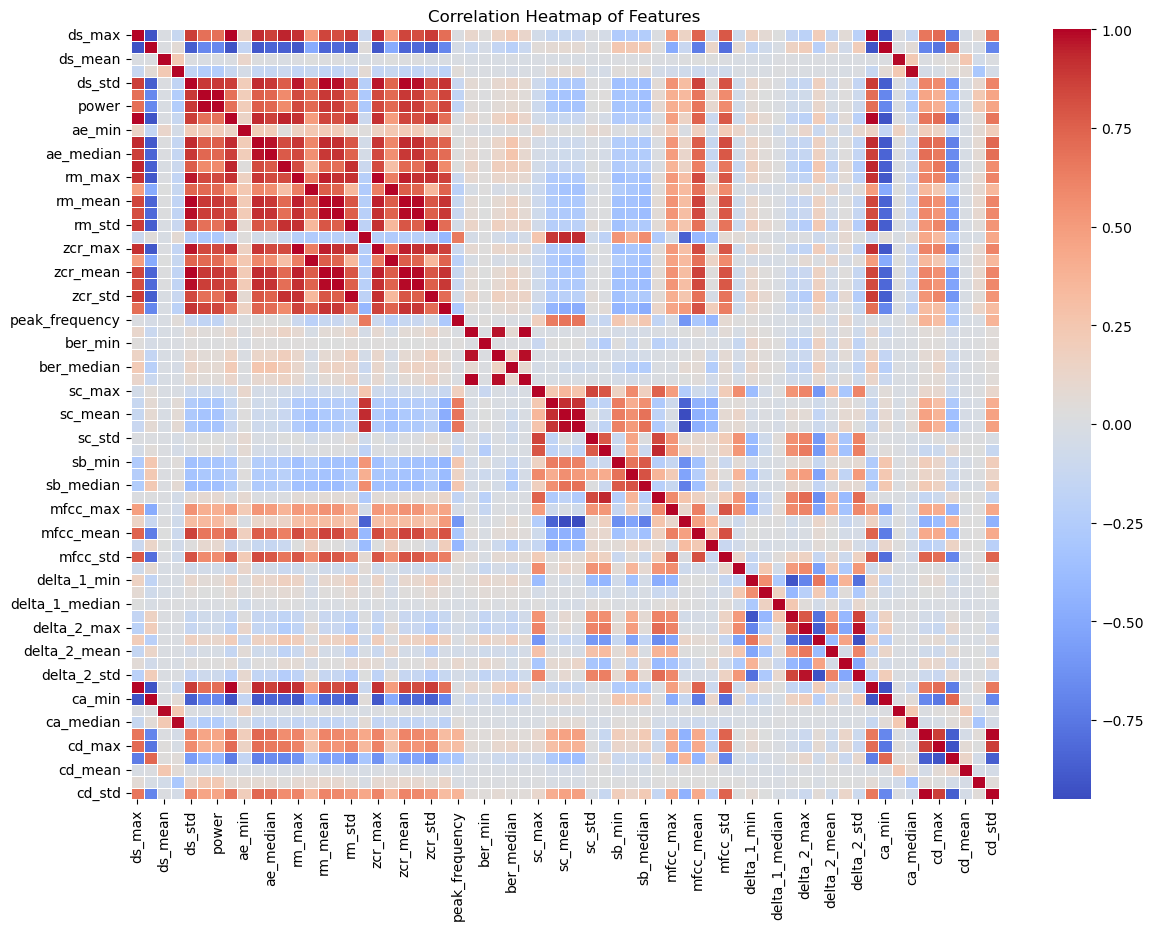

In [15]:
# TODO: Create a correlation heatmap of the features
import matplotlib.pyplot as plt
import seaborn as sns
numerical_df = df.drop(columns=[ "class"])

corr_matrix = numerical_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

## 4. Feature Analysis and Correlation Study

In this step, correlation analysis is performed on numerical features to understand relationships among features and identify potential redundancy.
The target variable (`class`) is excluded from feature correlation analysis to prevent data leakage.


In [18]:
#  Perform feature selection using suitable methods

import numpy as np
import pandas as pd

# 1. Compute correlation matrix (signal_id already removed earlier)
corr_matrix = df.corr()

# 2. Compute absolute correlation with the target variable
target_corr = corr_matrix["class"].abs()

# 3. Select features with correlation above threshold
threshold = 0.1
selected_features = target_corr[target_corr > threshold].index

# 4. Remove target variable from feature list
selected_features = selected_features.drop("class")

# 5. Create selected feature set and target vector
X_selected = df[selected_features]
y = df["class"]

print("Selected features:")
print(selected_features)

print("Shape of selected feature set:", X_selected.shape)


Selected features:
Index(['ds_max', 'ds_min', 'ds_std', 'ae_max', 'ae_mean', 'ae_median',
       'ae_std', 'rm_max', 'rm_mean', 'rm_median', 'rm_std', 'zcr', 'zcr_max',
       'zcr_mean', 'zcr_median', 'zcr_std', 'peak_amplitude', 'peak_frequency',
       'ber_median', 'sc_min', 'sc_mean', 'sc_median', 'sb_max', 'sb_min',
       'sb_median', 'sb_std', 'mfcc_min', 'mfcc_std', 'delta_1_min',
       'delta_1_std', 'delta_2_max', 'delta_2_min', 'delta_2_std', 'ca_max',
       'ca_min', 'ca_std', 'cd_max', 'cd_min', 'cd_std'],
      dtype='object')
Shape of selected feature set: (4000, 39)


## Training and Evaluating the Support Vector Machine (SVM) Model

In this step, a Support Vector Machine (SVM) classifier is trained using the selected features obtained from the feature selection process.
The dataset is split into training and testing subsets to evaluate model performance on unseen data.

Feature scaling is applied because SVM models are sensitive to the scale of input features.
The trained model is evaluated using accuracy, classification metrics, and a confusion matrix.


In [19]:
# TODO: Train an SVC model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X = X_selected          # selected features from feature selection
y = df["class"]         # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.svm import SVC

svc = SVC(kernel="rbf", random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

# TODO: Evaluate the model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.86625

Classification Report:
               precision    recall  f1-score   support

          -1       0.89      0.94      0.91       606
           1       0.76      0.65      0.70       194

    accuracy                           0.87       800
   macro avg       0.83      0.79      0.81       800
weighted avg       0.86      0.87      0.86       800


Confusion Matrix:
 [[567  39]
 [ 68 126]]


## Training and Evaluating the Random Forest Model

In this step, a Random Forest classifier is trained using the selected features.
The dataset is split into training and testing sets to assess the model’s performance on unseen data.

Random Forest is an ensemble learning method that builds multiple decision trees and aggregates their predictions.
Unlike SVM, Random Forest does not require feature scaling.
The model is evaluated using accuracy, classification metrics, and a confusion matrix.


In [20]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = X_selected        # selected features
y = df["class"]       # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.88625

Classification Report:
               precision    recall  f1-score   support

          -1       0.90      0.95      0.93       606
           1       0.82      0.68      0.74       194

    accuracy                           0.89       800
   macro avg       0.86      0.81      0.83       800
weighted avg       0.88      0.89      0.88       800


Confusion Matrix:
 [[578  28]
 [ 63 131]]


## Hyperparameter Optimization of the SVM Model Using Bayesian Optimization

In this step, hyperparameter tuning is performed to improve the performance of the Support Vector Machine (SVM) model.
Bayesian Optimization is used instead of Grid Search because it is more efficient for continuous hyperparameter spaces.

A pipeline is created to combine feature scaling and the SVM classifier, ensuring that scaling is applied consistently during cross-validation.
The hyperparameters tuned include the regularization parameter (`C`) and the kernel coefficient (`gamma`) for the RBF kernel.

The tuned model is evaluated on the test set using accuracy, classification metrics, and a confusion matrix.
Finally, the optimized SVM model is saved for future use.


In [ ]:
#  Perform hyperparameter tuning using Bayesian Optimization or Grid Search
from skopt import BayesSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline: scaling + SVM
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

# Define the hyperparameter search space
param_space = {
    "svm__C": (0.1, 100.0),
    "svm__gamma": (0.001, 1.0),
    "svm__kernel": ["rbf"]
}

# Bayesian Optimization search
bayes_search = BayesSearchCV(
    estimator=svm_pipeline,
    search_spaces=param_space,
    n_iter=30,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1
)

# Fit Bayesian Optimization
bayes_search.fit(X_train, y_train)

# Print best parameters
print("Best SVM parameters:", bayes_search.best_params_)


#  Evaluate the tuned model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get the best tuned SVM model
best_svm = bayes_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm.predict(X_test)

# Evaluate performance
print("Tuned SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#  Save the final model using joblib 
import joblib

# Save the tuned SVM model
joblib.dump(best_svm, "tuned_svm_model1.pkl")

print("Tuned SVM model saved successfully.")


c:\Users\klena\anaconda3\envs\bmi_lab\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, 0.001, np.str_('rbf')] before, using random point [24.138244627578484, 0.6144459591734192, 'rbf']
  warnings.warn(


Best SVM parameters: OrderedDict({'svm__C': 99.94045004860223, 'svm__gamma': 0.005022734891553273, 'svm__kernel': 'rbf'})
Tuned SVM Accuracy: 0.8725

Classification Report:
               precision    recall  f1-score   support

          -1       0.91      0.92      0.92       606
           1       0.74      0.73      0.74       194

    accuracy                           0.87       800
   macro avg       0.83      0.82      0.83       800
weighted avg       0.87      0.87      0.87       800


Confusion Matrix:
 [[556  50]
 [ 52 142]]
Tuned SVM model saved successfully.


## Hyperparameter Optimization of the Random Forest Model Using Bayesian Optimization

In this step, hyperparameter tuning is performed to improve the performance of the Random Forest classifier.
Bayesian Optimization is applied to efficiently search for optimal hyperparameter combinations, reducing the computational cost compared to exhaustive Grid Search.

The hyperparameters tuned include:
- Number of trees (`n_estimators`)
- Maximum tree depth (`max_depth`)
- Minimum number of samples required to split a node (`min_samples_split`)
- Minimum number of samples required at a leaf node (`min_samples_leaf`)

After tuning, the best-performing Random Forest model is evaluated on the test set using accuracy, classification metrics, and a confusion matrix.
Finally, the optimized Random Forest model is saved for future use.


In [ ]:
#  Perform hyperparameter tuning using Bayesian Optimization
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter search space
param_space = {
    "n_estimators": (100, 500),
    "max_depth": (5, 50),
    "min_samples_split": (2, 20),
    "min_samples_leaf": (1, 10)
}

# Bayesian Optimization search
bayes_search_rf = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    n_iter=30,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1
)

# Fit Bayesian Optimization
bayes_search_rf.fit(X_train, y_train)

# Print best parameters
print("Best Random Forest parameters:", bayes_search_rf.best_params_)

#  Evaluate the tuned model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get the best tuned Random Forest model
best_rf = bayes_search_rf.best_estimator_

# Make predictions
y_pred_rf = best_rf.predict(X_test)

# Evaluate performance
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

#  Save the final model using joblib
import joblib

# Save the tuned Random Forest model
joblib.dump(best_rf, "tuned_random_forest_model1.pkl")

print("Tuned Random Forest model saved successfully.")
 

Best Random Forest parameters: OrderedDict({'max_depth': 23, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500})
Tuned Random Forest Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

          -1       0.91      0.95      0.93       606
           1       0.83      0.69      0.75       194

    accuracy                           0.89       800
   macro avg       0.87      0.82      0.84       800
weighted avg       0.89      0.89      0.89       800


Confusion Matrix:
 [[578  28]
 [ 60 134]]
Tuned Random Forest model saved successfully.


## Evaluation and Comparison of Tuned SVM and Random Forest Models

In this section, the performance of the tuned Support Vector Machine (SVM) and Random Forest models is evaluated and compared.
Multiple evaluation metrics are computed to provide a comprehensive assessment of classification performance.

The metrics include:
- Accuracy
- Sensitivity (Recall)
- Specificity
- F1-score
- Confusion matrix components (TP, TN, FP, FN)

These metrics are particularly important in biomedical information processing, where both false positives and false negatives can have significant consequences.
The comparison focuses on the tuned models, with optional reference to baseline performance if needed.


In [ ]:
# Evaluate and compare the performance of the best SVM and Random Forest models (optionally: before and after hyperparameter tuning)
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score

def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()

    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    f1 = f1_score(y_true, y_pred)

    return {
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "F1-score": f1,
        "TP": TP,
        "TN": TN,
        "FP": FP,
        "FN": FN
    }
# Get tuned SVM model
best_svm = bayes_search.best_estimator_

# Predict on test data
svm_pred = best_svm.predict(X_test)
svm_metrics = calculate_metrics(y_test, svm_pred)

print("Tuned SVM Metrics:")
for k, v in svm_metrics.items():
    print(f"{k}: {v}")

svm_metrics = calculate_metrics(y_test, svm_pred)
print("Tuned SVM Metrics:")
for k, v in svm_metrics.items():
    print(f"{k}: {v}")
rf_metrics = calculate_metrics(y_test, y_pred_rf)
print("\nTuned Random Forest Metrics:")
for k, v in rf_metrics.items():
    print(f"{k}: {v}")


Tuned SVM Metrics:
Accuracy: 0.8725
Sensitivity: 0.7319587628865979
Specificity: 0.9174917491749175
F1-score: 0.7357512953367875
TP: 142
TN: 556
FP: 50
FN: 52
Tuned SVM Metrics:
Accuracy: 0.8725
Sensitivity: 0.7319587628865979
Specificity: 0.9174917491749175
F1-score: 0.7357512953367875
TP: 142
TN: 556
FP: 50
FN: 52

Tuned Random Forest Metrics:
Accuracy: 0.89
Sensitivity: 0.6907216494845361
Specificity: 0.9537953795379538
F1-score: 0.7528089887640449
TP: 134
TN: 578
FP: 28
FN: 60


## Accuracy Comparison of Tuned Models

This plot compares the classification accuracy of the tuned Support Vector Machine (SVM) and Random Forest models.
Accuracy provides an overall measure of correct predictions and allows a direct comparison of model performance.


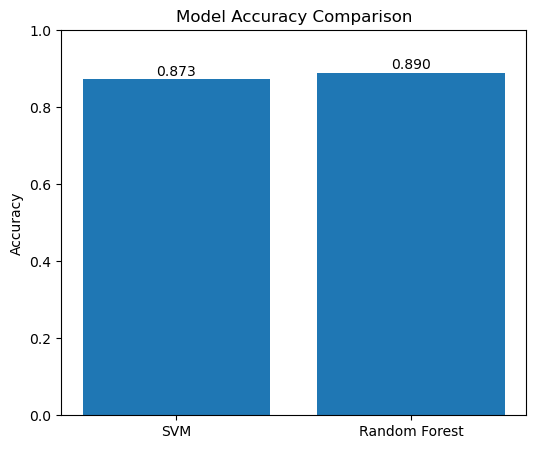

In [25]:
import matplotlib.pyplot as plt

# Extract accuracies from computed metrics
svm_accuracy = svm_metrics["Accuracy"]
rf_accuracy = rf_metrics["Accuracy"]

# Model names and accuracies
models = ["SVM", "Random Forest"]
accuracies = [svm_accuracy, rf_accuracy]

# Create bar chart
plt.figure(figsize=(6, 5))
plt.bar(models, accuracies)

# Labels and title
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)

# Show accuracy values on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.3f}", ha="center")

# Display plot
plt.show()


## Task 6: Evaluation and Comparison of Tuned Models

In this task, the performance of the tuned Support Vector Machine (SVM) and Random Forest models is evaluated and compared using multiple visualization techniques.

First, confusion matrices are generated for both models to analyze the distribution of true positives, true negatives, false positives, and false negatives.
These matrices provide insight into the types of classification errors made by each model.

Next, a comparative performance plot is created using key evaluation metrics:
- Accuracy
- Sensitivity (Recall)
- Specificity
- F1-score

This comparison allows a clear assessment of the strengths and weaknesses of each model, which is particularly important in biomedical information processing applications.


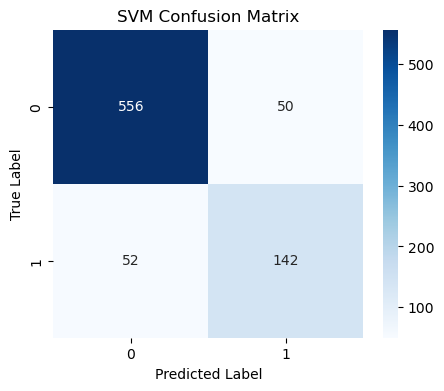

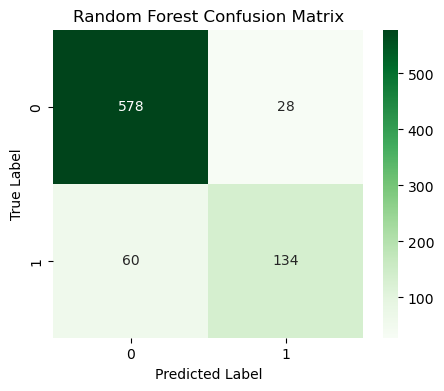

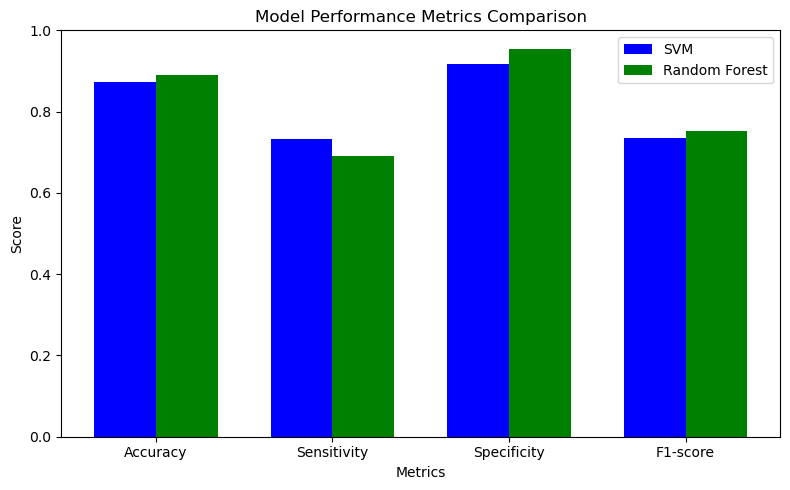

In [26]:
# ================================
# Task-6: Evaluation & Comparison
# ================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --------------------------------
# 1. CONFUSION MATRIX — SVM
# --------------------------------
cm_svm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# --------------------------------
# 2. CONFUSION MATRIX — RANDOM FOREST
# --------------------------------
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# --------------------------------
# 3. PERFORMANCE METRICS COMPARISON
# --------------------------------
metrics = ["Accuracy", "Sensitivity", "Specificity", "F1-score"]

svm_values = [svm_metrics[m] for m in metrics]
rf_values = [rf_metrics[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, svm_values, width, label="SVM", color="blue")
plt.bar(x + width/2, rf_values, width, label="Random Forest", color="green")

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Model Performance Metrics Comparison")
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()


## Summary Table of Model Performance

This table summarizes and compares the performance of the tuned Support Vector Machine (SVM) and Random Forest models.
It includes overall evaluation metrics as well as confusion matrix components, providing a comprehensive view of model performance.

The table allows an easy side-by-side comparison of the two models and supports quantitative interpretation of the classification results.


In [27]:

import pandas as pd

# Create a results table from computed metrics
results_table = pd.DataFrame({
    "Metric": ["Accuracy", "Sensitivity (Recall)", "Specificity", "F1-score", 
               "True Positives", "True Negatives", "False Positives", "False Negatives"],
    
    "SVM": [
        svm_metrics["Accuracy"],
        svm_metrics["Sensitivity"],
        svm_metrics["Specificity"],
        svm_metrics["F1-score"],
        svm_metrics["TP"],
        svm_metrics["TN"],
        svm_metrics["FP"],
        svm_metrics["FN"]
    ],
    
    "Random Forest": [
        rf_metrics["Accuracy"],
        rf_metrics["Sensitivity"],
        rf_metrics["Specificity"],
        rf_metrics["F1-score"],
        rf_metrics["TP"],
        rf_metrics["TN"],
        rf_metrics["FP"],
        rf_metrics["FN"]
    ]
})

# Display table
results_table


,Metric,SVM,Random Forest
0,Accuracy,0.872500,0.890000
1,Sensitivity (Recall),0.731959,0.690722
2,Specificity,0.917492,0.953795
3,F1-score,0.735751,0.752809
4,True Positives,142.000000,134.000000
5,True Negatives,556.000000,578.000000
6,False Positives,50.000000,28.000000
7,False Negatives,52.000000,60.000000
